<a href="https://colab.research.google.com/github/miihsoraya/Trilhas-Inova-5/blob/main/5_desafio_inova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
#1. Substituir o cabeçalho por palavras em letras maiúsculas;
#2. Corrigir os dados faltantes e preencher as lacunas com valores adequados;
#3. Eliminar os outliers, atribuindo no lugar deles os valores adequados;
#4. Eliminar os duplicados, para garantir a unicidade das informações;
#5. Substituir os NANs por valores adequados; ZEROS E INDEFINIDOS
#6. Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais;
#7. Vá além das dicas fornecidas, para melhorar a sua habilidade em limpeza e tratamento de dados.

In [333]:
import pandas as pd
import numpy as np
import json #arquivo
import matplotlib.pyplot as plt
import seaborn as sns

In [362]:
arquivo = 'Planilha do desafio 5 - Ciência de dados.xlsx'

pd.set_option('display.max_columns',25)  # Exibir todas as colunas
pd.set_option('display.width', 1000)
banco_nordeste = pd.read_excel(arquivo)

print(banco_nordeste)

       Id  Pontos Estado     Genero  Idade  Bens  Saldo na Conta  Produto  Possui cartao  Ativo     Salario  Saiu
0       1     619     BA   Feminino     42     2               0        1              1      1  10134888.0     1
1       2     608     CE   Feminino     41     1         8380786        1              0      1  11254258.0     0
2       3     502     BA   Feminino     42     8         1596608        3              1      0  11393157.0     1
3       4     699     BA   Feminino     39     1               0        2              0      0   9382663.0     0
4       5     850     CE   Feminino     43     2        12551082        1              1      1    790841.0     0
..    ...     ...    ...        ...    ...   ...             ...      ...            ...    ...         ...   ...
994   996     838     CE  Masculino     43     9        12310588        2              1      0  14576583.0     0
995   997     610     CE  Masculino     29     9               0        3              0

In [335]:
banco_nordeste.columns = [i.upper() for i in banco_nordeste.columns] #maiusculas
banco_nordeste.drop_duplicates(inplace=True) #duplicadas
banco_nordeste['GENERO'].replace({'Mas': 'Masculino', 'M': 'Masculino', 'Fem': 'Feminino', 'F': 'Feminino'}, inplace=True) #dados categóricos
#poderia ser .rename(index = {Mas: 'Masculino'})

In [336]:
nan = banco_nordeste[banco_nordeste.isna().any(axis=1)] #checar valores NaN | 1 = columns
#print(nan)

banco_nordeste['SALARIO'] = banco_nordeste['SALARIO'].fillna(0) #alterar valor NaN de SALARIO
banco_nordeste['GENERO'] = banco_nordeste['GENERO'].fillna("Indefinido") #alterar valor NaN de GENERO para INDEFINIDO

In [337]:
#alterando dados binários
banco_nordeste[['POSSUI CARTAO', 'ATIVO', 'SAIU']] = banco_nordeste[['POSSUI CARTAO', 'ATIVO', 'SAIU']].replace({1: "Sim", 0: "Não"})

In [338]:
with open('estados.json', 'r', encoding='utf-8') as file:
    estado = json.load(file)

banco_nordeste['ESTADO'].replace(estado, inplace=True) #Substituir as siglas dos Estados

In [339]:
# Criando uma coluna Descrição
banco_nordeste['DESCRIÇÃO'] = banco_nordeste.apply(lambda row: f"Possui {row['PONTOS']} pontos, {row['BENS']} bens e mora em {row['ESTADO']}. Adquiriu {row['PRODUTO']} produtos. Usuário {'Ativo' if row['ATIVO'] == 'Sim' else 'Não está ativo'}.", axis=1)


In [361]:
banco_nordeste.head()


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,DESCRIÇÃO
0,1,619,Bahia,Feminino,42,2,0,1,Sim,Sim,10134888.0,Sim,"Possui 619 pontos, 2 bens e mora em Bahia. Adq..."
1,2,608,Ceará,Feminino,41,1,8380786,1,Não,Sim,11254258.0,Não,"Possui 608 pontos, 1 bens e mora em Ceará. Adq..."
2,3,502,Bahia,Feminino,42,8,1596608,3,Sim,Não,11393157.0,Sim,"Possui 502 pontos, 8 bens e mora em Bahia. Adq..."
3,4,699,Bahia,Feminino,39,1,0,2,Não,Não,9382663.0,Não,"Possui 699 pontos, 1 bens e mora em Bahia. Adq..."
4,5,850,Ceará,Feminino,43,2,12551082,1,Sim,Sim,790841.0,Não,"Possui 850 pontos, 2 bens e mora em Ceará. Adq..."


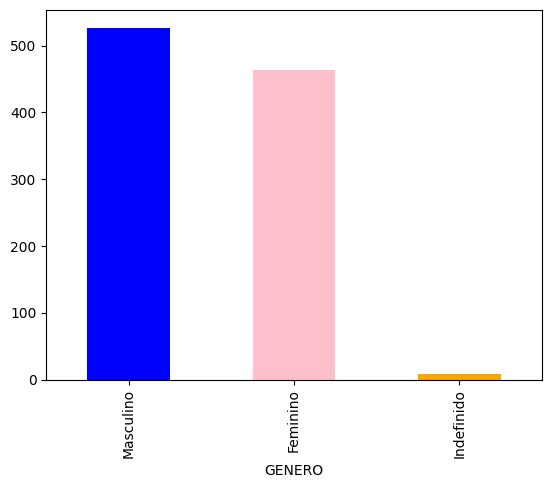

GENERO
Masculino     527
Feminino      463
Indefinido      8
Name: count, dtype: int64

In [341]:
#### Análise das frequencias qualitativas

banco_nordeste['GENERO'].value_counts().plot(kind='bar', color=['blue', 'pink','orange'])

plt.show()
banco_nordeste['GENERO'].value_counts()

In [342]:
freq = banco_nordeste['GENERO'].value_counts()

In [343]:
perc = banco_nordeste['GENERO'].value_counts(normalize = True) * 100
perc = perc.round(1)

In [360]:
#criação de dataframe para dados de Sexo
freq_qualitativas = pd.DataFrame({'SEXO':freq.index,'FREQUÊNCIA':freq, 'PORCENTAGEM (%)':perc})
freq_qualitativas

,SEXO,FREQUÊNCIA,PORCENTAGEM (%)
GENERO,,,
Masculino,Masculino,527,52.8
Feminino,Feminino,463,46.4
Indefinido,Indefinido,8,0.8


<ipython-input-346-3733ffc35107>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(banco_nordeste['SALARIO'])


<Axes: title={'center': 'Distribuição Salarial'}, xlabel='R$', ylabel='Density'>

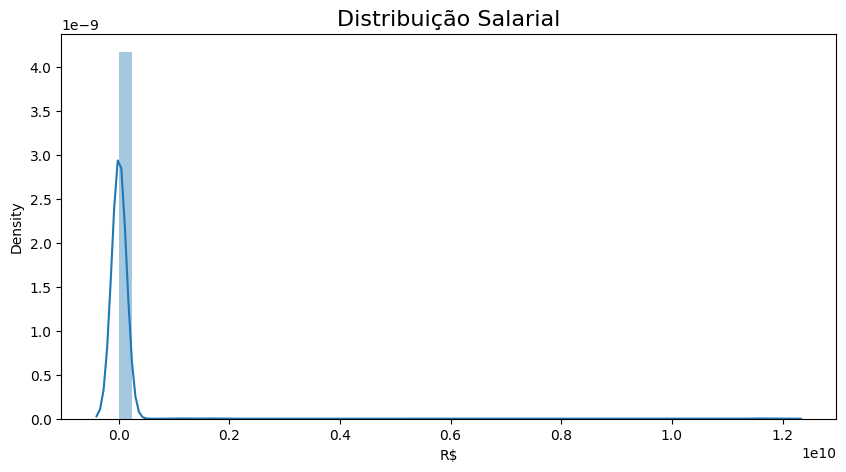

In [346]:
#### Análise das frequencias quantitativas

ax = sns.distplot(banco_nordeste['SALARIO'])
ax.figure.set_size_inches(10,5)
ax.set_title("Distribuição Salarial", fontsize=16)
ax.set_xlabel('R$')
ax


<Axes: xlabel='SALARIO'>

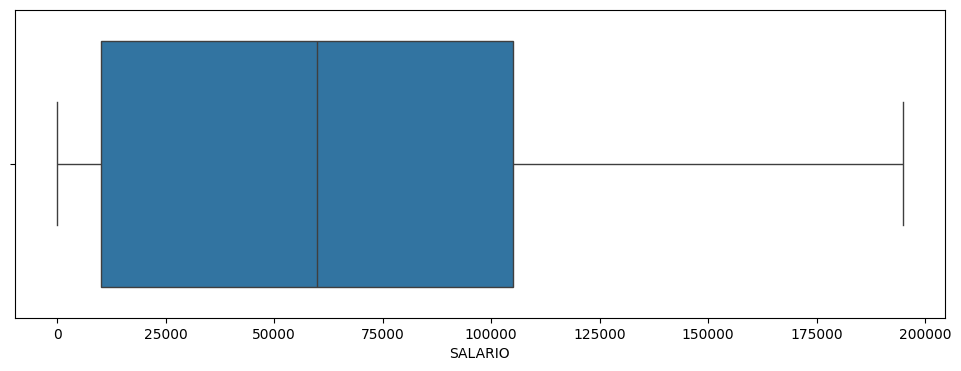

In [347]:
ax = sns.boxplot(x = 'SALARIO', data = banco_nordeste.query('SALARIO < 200000'), orient = 'h')
ax.figure.set_size_inches(12,4)
ax

In [349]:
banco_nordeste['SALARIO'].quantile([0.25,0.50,0.75])

0.25     2849010.50
0.50     8637195.50
0.75    14013806.75
Name: SALARIO, dtype: float64

In [350]:
#DETECTAR OUTLIERS DE SALARIO

Q1 = banco_nordeste['SALARIO'].quantile(0.25)
Q3 = banco_nordeste['SALARIO'].quantile(0.75)
IQR = Q3 - Q1 #intervalo interquartil

# limites inferior e superior
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

outliers = banco_nordeste[(banco_nordeste['SALARIO'] < inferior) | (banco_nordeste['SALARIO'] > superior)]
outliers


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,DESCRIÇÃO
7,8,376,Ceará,Feminino,29,4,11504674,4,Sim,Não,1.193469e+10,Sim,"Possui 376 pontos, 4 bens e mora em Ceará. Adq..."
116,118,668,Ceará,Feminino,37,6,1678644,1,Sim,Não,1.156383e+10,Não,"Possui 668 pontos, 6 bens e mora em Ceará. Adq..."
170,172,484,Maranhão,Feminino,29,4,13011439,1,Sim,Não,1.640179e+09,Não,"Possui 484 pontos, 4 bens e mora em Maranhão. ..."
230,232,673,Maranhão,Masculino,72,1,0,2,Não,Sim,1.119812e+09,Não,"Possui 673 pontos, 1 bens e mora em Maranhão. ..."


In [351]:
#Editando valores Outliers | retirando zeros em excesso
banco_nordeste['SALARIO'].loc[7] = banco_nordeste['SALARIO'].loc[7] /1000
banco_nordeste['SALARIO'].loc[116] = banco_nordeste['SALARIO'].loc[116] /1000
banco_nordeste['SALARIO'].loc[170] = banco_nordeste['SALARIO'].loc[170] /100
banco_nordeste['SALARIO'].loc[230] = banco_nordeste['SALARIO'].loc[230] /100

        #Não executar individualmente#

<ipython-input-351-7d8ed60961fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_nordeste['SALARIO'].loc[7] = banco_nordeste['SALARIO'].loc[7] /1000
<ipython-input-351-7d8ed60961fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_nordeste['SALARIO'].loc[116] = banco_nordeste['SALARIO'].loc[116] /1000
<ipython-input-351-7d8ed60961fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_nordeste['SALARIO'].loc[170] = banc

In [352]:
banco_nordeste['SALARIO'].loc[230] #checagem

11198119.0

<ipython-input-353-3733ffc35107>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(banco_nordeste['SALARIO'])


<Axes: title={'center': 'Distribuição Salarial'}, xlabel='R$', ylabel='Density'>

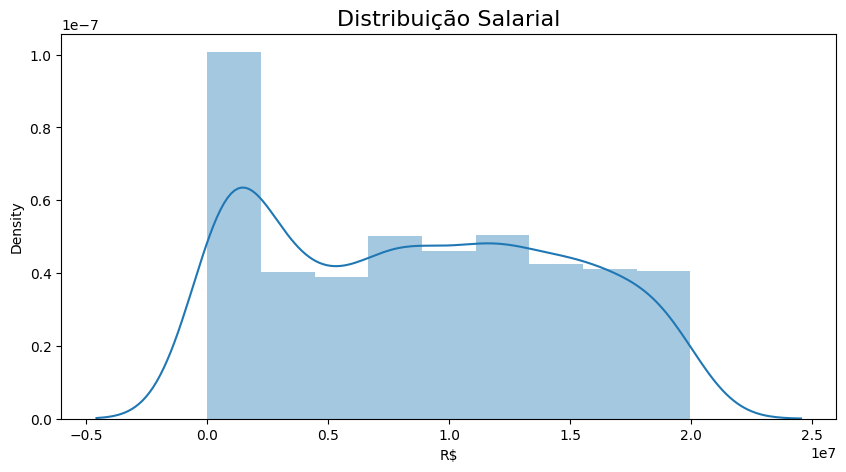

In [353]:
## Análise das frequencias quantitativas após tratar outliers

ax = sns.distplot(banco_nordeste['SALARIO'])
ax.figure.set_size_inches(10,5)
ax.set_title("Distribuição Salarial", fontsize=16)
ax.set_xlabel('R$')
ax

In [354]:
classes = [0, 2000, 20000, 200000, 2000000, 19972539]
labels = ['< 2.000', '2.000 - 20.000', '20.000 - 200.000', '200.000 - 2.000.000', '> 2.000.000']

In [355]:
freq_qnt = pd.value_counts(pd.cut(x= banco_nordeste.SALARIO,
       bins = classes,
       labels = labels,
       include_lowest = True #incluir o 0
))
freq_qnt

SALARIO
> 2.000.000            781
200.000 - 2.000.000    170
20.000 - 200.000        33
< 2.000                  7
2.000 - 20.000           7
Name: count, dtype: int64

In [356]:
per_qnt = pd.value_counts(pd.cut(x= banco_nordeste.SALARIO,
       bins = classes,
       labels = labels,
       include_lowest = True #incluir o 0
), normalize = True) * 100
#per_qnt = per_qnt.round(1)

In [357]:
#criação de dataframe para dados de Salário
freq_quantitativas = pd.DataFrame({'SALÁRIO': freq_qnt.index, 'FREQUÊNCIA':freq_qnt, 'PORCENTAGEM (%)':per_qnt})
freq_quantitativas.sort_index(ascending = False, inplace = True)
freq_quantitativas

,SALÁRIO,FREQUÊNCIA,PORCENTAGEM (%)
SALARIO,,,
> 2.000.000,> 2.000.000,781,78.256513
200.000 - 2.000.000,200.000 - 2.000.000,170,17.034068
20.000 - 200.000,20.000 - 200.000,33,3.306613
2.000 - 20.000,2.000 - 20.000,7,0.701403
< 2.000,< 2.000,7,0.701403


In [358]:
#criação de dataframe de média salarial entre sexo/Estado
media_sexo_renda = pd.crosstab(banco_nordeste.GENERO,
                                   banco_nordeste.ESTADO,
                                   aggfunc={'mean'},
                                   values = banco_nordeste.SALARIO).round(2)

contagem_pessoas = banco_nordeste.groupby(['GENERO', 'ESTADO']).size().unstack(fill_value=0)

media_sexo_renda = media_sexo_renda.astype(str) + ' (' + contagem_pessoas.astype(str) + ')'
media_sexo_renda

mean                                                                                    
ESTADO                Bahia             Ceará          Maranhão    Minas Gerais  Rio de Janeiro       São Paulo
GENERO                                                                                                         
Feminino    10979514.86 (7)  8654743.41 (243)  8764512.55 (205)   8822823.0 (3)  10136275.5 (2)   7310828.0 (3)
Indefinido          nan (0)     7548568.0 (3)     5947805.0 (4)   9284067.0 (1)         nan (0)         nan (0)
Masculino    6632705.57 (7)  9110496.35 (259)  8612071.12 (253)  12337909.6 (5)  10878821.0 (2)  11341049.0 (1)

In [359]:
#Salvando arquivo em xlsx, particionado em abas dentro da planilha

arquivo = 'dados_funcionarios.xlsx'

with pd.ExcelWriter(arquivo, engine='openpyxl') as writer:

    banco_nordeste.to_excel(writer, sheet_name='Dados do Banco - Nordeste', index=False)
    freq_qualitativas.to_excel(writer, sheet_name='Dados Qualitativos - Sexo', index=False)
    freq_quantitativas.to_excel(writer, sheet_name='Dados Quantitativos - Salario', index=False)
    media_sexo_renda.to_excel(writer, sheet_name='Média Salarial de Sexo|Estado')